<a href="https://colab.research.google.com/github/PoulamiDasDA/Santander_Customer_Satisfaction_Kaggle/blob/master/CLL_Prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing library to upload files
#from google.colab import files

upload the data files

In [2]:
# Uploading the files
#upload = files.upload()

In [3]:
# Unzip the data
#!unzip santander-customer-satisfaction.zip

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the data

In [5]:
traindata=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')

Understanding the data

In [6]:
traindata.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.94,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0

Get shape of the data

In [7]:
traindata.shape

(76020, 371)

In [8]:
testdata.shape

(75818, 370)

Get a summary on the data type of all the columns

In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
traindata.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Checking the missing values in the data

In [11]:
missingvalueDf=pd.DataFrame(traindata.isnull().sum(), columns= ['Number of missing values'])
missingvalueDf[missingvalueDf['Number of missing values']>0]

,Number of missing values


It can be seen that there is no missing value in data

Check for presence of 0s in the data

In [12]:
zerovaluecolumnlist=[]
for feature in traindata.columns:
  zerocount=(traindata[feature]==0).sum()
  if zerocount>0:
    print('Number of zeroes in column ' + feature + ' is ' + str(zerocount))
    if(zerocount==76020):
      print('the column ' + feature + ' contains only zero values')
      zerovaluecolumnlist.append(feature)
  else:
    print('column ' + feature + ' does not have any zeroes')

print(zerovaluecolumnlist)

column ID does not have any zeroes
Number of zeroes in column var3 is 75
column var15 does not have any zeroes
Number of zeroes in column imp_ent_var16_ult1 is 72301
Number of zeroes in column imp_op_var39_comer_ult1 is 66075
Number of zeroes in column imp_op_var39_comer_ult3 is 64330
Number of zeroes in column imp_op_var40_comer_ult1 is 75725
Number of zeroes in column imp_op_var40_comer_ult3 is 75672
Number of zeroes in column imp_op_var40_efect_ult1 is 75982
Number of zeroes in column imp_op_var40_efect_ult3 is 75975
Number of zeroes in column imp_op_var40_ult1 is 75791
Number of zeroes in column imp_op_var41_comer_ult1 is 66226
Number of zeroes in column imp_op_var41_comer_ult3 is 64480
Number of zeroes in column imp_op_var41_efect_ult1 is 69336
Number of zeroes in column imp_op_var41_efect_ult3 is 67372
Number of zeroes in column imp_op_var41_ult1 is 64388
Number of zeroes in column imp_op_var39_efect_ult1 is 69325
Number of zeroes in column imp_op_var39_efect_ult3 is 67360
Number

It can be seen that there are certain column which contain only 0s,so this column does not have any variablity, and can be removed in further analysis and there are certain columns for which majority of data is 0, for which the concentration of other values need to be checked


Lets also verify if test data set also has 0s for these columns if it is then we can ignore those columns

In [13]:
zerovaluecolumnlistintest=[]
for feature in testdata.columns:
  zerocount=(testdata[feature]==0).sum()
  if zerocount>0:
    if(zerocount==75818):
      zerovaluecolumnlistintest.append(feature)
print(zerovaluecolumnlistintest)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var17_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var17_out_ult1', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3']


In [14]:
set(zerovaluecolumnlist)-set(zerovaluecolumnlistintest)

set()

so it seems these columns do not have any data except 0 in both train and test data set, so they can be ignored
Next removing those columns from test and train data

In [15]:
traindataNew=traindata[[col for col in traindata.columns if not (col in zerovaluecolumnlist)]]
traindataNew.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=337)

In [16]:
testdataNew=testdata[[col for col in testdata.columns if not (col in zerovaluecolumnlist)]]

target variable distribution

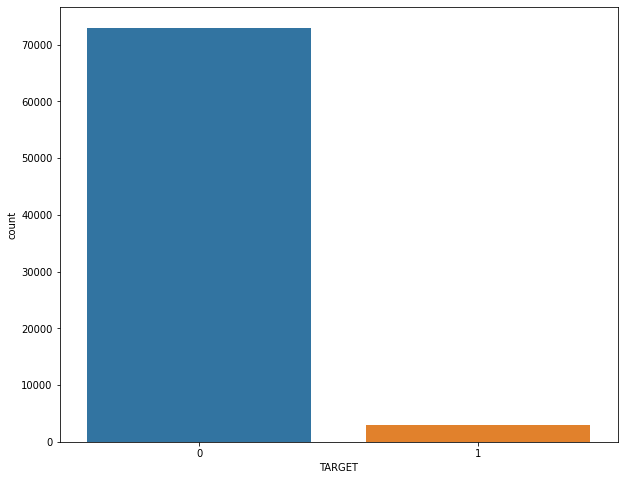

In [17]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'TARGET', data = traindataNew)

In [18]:
print('No of customers who are not satisfied ' + str(len(traindataNew[traindataNew['TARGET'] == 1])))
print('No of customers who are satisfied ' + str(len(traindataNew[traindataNew['TARGET'] == 0])))

No of customers who are not satisfied 3008
No of customers who are satisfied 73012


Lets look at the correlation between all variables, based on that we will look into individual variables for deeper analysis


In [19]:
traindataNew.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,-0.008326,0.000596,-0.002515,-0.001869,-0.002927,-0.000303,-0.002239,-0.003173,-0.001409,-0.006793,-0.001022,-0.007269,0.002002,0.003493,-0.007909,-0.007154,-0.003050,-0.003880,-0.002967,-0.006262,0.000466,0.000439,-0.000157,0.000632,0.000228,0.000947,0.000947,-0.000055,0.001872,0.000518,...,-0.006771,-0.002364,-0.001904,0.000839,-0.006679,-0.001095,-0.001325,-0.006825,-0.006099,-0.005683,-0.005480,-0.002670,0.000061,-0.001763,-0.001883,0.003373,0.000935,0.002975,0.003911,0.000066,-0.001746,-0.001336,-0.003024,-0.003714,-0.002258,-0.002629,0.000693,0.000137,-0.005999,-0.007631,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,0.001311,0.005916,0.006764,0.001676,0.002459,0.003993,0.001695,0.002474,0.004084,0.000460,0.001069,0.002424,-0.008234,0.038505,0.000401,0.000200,0.007205,0.006711,0.010520,0.008533,0.009187,0.008278,0.008129,0.003986,0.003952,0.000200,0.000200,0.009058,0.006084,0.002857,...,0.003332,0.003423,0.004099,0.001541,0.000716,0.002211,0.002225,0.004144,0.002590,0.004831,0.004851,0.005397,0.003027,0.005948,0.005896,0.002324,0.001381,0.002353,0.002381,0.000198,0.000176,0.000183,0.000234,0.000166,0.000347,0.000331,0.000199,0.000143,0.000191,0.000229,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,0.035884,0.088145,0.093354,0.085281,0.074686,0.104643,0.085215,0.074783,0.107229,0.013525,0.106042,0.054182,-0.112228,-0.098936,0.010521,0.010605,0.111776,0.101437,0.262891,0.219815,0.300081,0.243894,0.241273,0.186658,0.186964,0.003083,0.003083,0.298543,0.153101,0.058124,...,0.131156,0.132090,0.167988,0.042061,0.018036,0.054037,0.057478,0.163108,0.109747,0.185961,0.186720,0.188661,0.106964,0.210294,0.207802,0.122017,0.072549,0.121317,0.122041,0.002854,0.002151,0.002339,0.015796,0.011859,0.020383,0.019886,0.007891,-0.002859,0.010679,0.011623,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,0.011502,0.040879,0.034387,0.0

Describe the data


In [20]:
traindataNew.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,0.023652,0.005301,...,8.913659e+02,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,0.151962,0.072617,...,9.888597e+03,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,929

Analysis from the 5 point summary and box plot

In [21]:
def distributionOfNumericalColumns(data,colname):
    
    #count
    count=data[colname].count()
    #mean
    mean=data[colname].mean()
    #median
    median=data[colname].median()
    #mode
    mode=data[colname].mode()
    #std
    std=data[colname].std()
    #skewness
    skew=data[colname].skew()
    #min
    min=data[colname].min()
    #Q1
    Q1=data[colname].quantile(0.25)
    #Q2
    Q2=data[colname].quantile(0.50)
    #Q3
    Q3=data[colname].quantile(0.75)
    #max
    max=data[colname].max()
    

    print("min=" + str(min) + " \tQ1 (25%) =" + str(Q1) + " \tQ2 (50%) =" + str(Q2) + " \nQ3 (75%) =" + str(Q3) +
          " \tmax=" + str(max) + "  \t(Q2-Q1)=" + str(Q2-Q1)
         + " \n(Q3-Q2)=" + str(Q3-Q2) + " \t(max-Q3)=" + str(max-Q3))
    IQR=Q3-Q1
    print("IQR =" + str(IQR) + " Q1-1.5*IQR (lower whisker) =" + str(Q1-1.5*IQR) + " Q3+1.5*IQR (upper whisker ) =" + str(Q3+1.5*IQR))
    
    # Observations that lie below Q1-1.5IQR and above Q3+1.IQR are all outliers
    # rows containing outliers
    print("Using IQR")
    outlier_data=data.loc[((data[colname]<(Q1-1.5*IQR))|(data[colname]>(Q3+1.5*IQR)))==True]
    print("no of Rows containing " + colname + " as Outliers " + str(len(outlier_data)))

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(20, 10))
    

    sns.boxplot(data[colname], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode[0], color='b', linestyle='-')

    sns.distplot(data[colname],kde=True,ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode[0], color='b', linestyle='-')

    plt.xlabel(colname)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis
    plt.legend({'Mean':mean,'Median':median,'Mode':mode[0]})

    ax_box.set(xlabel='')
    plt.show()

min=1 	Q1 (25%) =38104.75 	Q2 (50%) =76043.0 
Q3 (75%) =113748.75 	max=151838  	(Q2-Q1)=37938.25 
(Q3-Q2)=37705.75 	(max-Q3)=38089.25
IQR =75644.0 Q1-1.5*IQR (lower whisker) =-75361.25 Q3+1.5*IQR (upper whisker ) =227214.75
Using IQR
no of Rows containing ID as Outliers 0


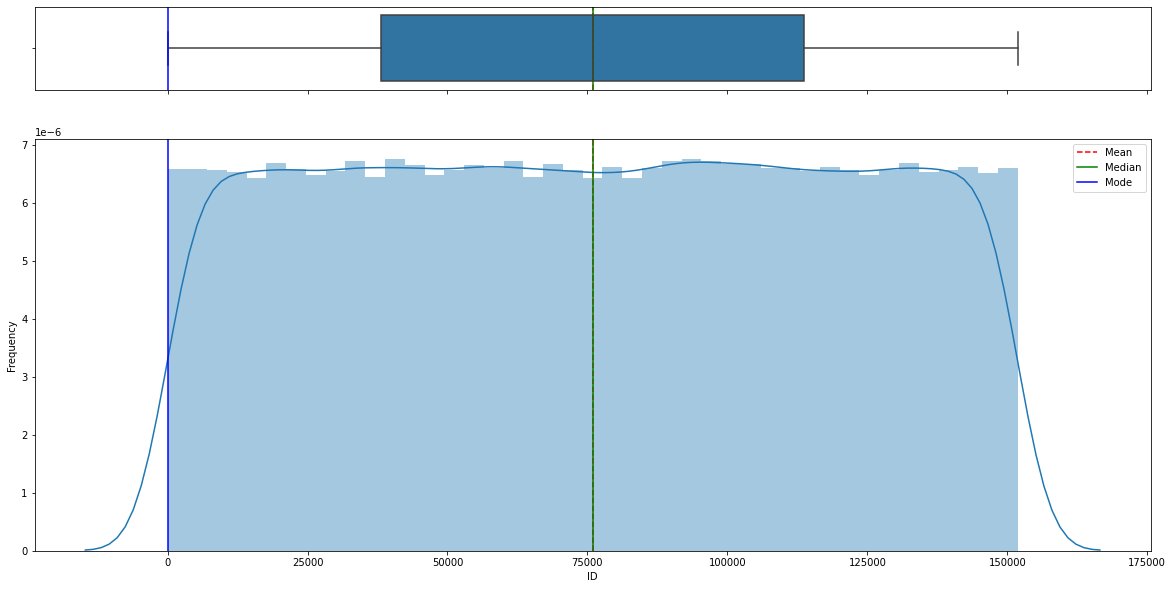

In [27]:
distributionOfNumericalColumns(traindataNew,"ID")

Variable ID has almost uniform distribution, and its values starts from 1 and then goes on till 151838, and from mode also it can be seen that rows contain all unique values
So its very likely that its a monotonically increasing column just to notify row numbers

min=-999999 	Q1 (25%) =2.0 	Q2 (50%) =2.0 
Q3 (75%) =2.0 	max=238  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=236.0
IQR =0.0 Q1-1.5*IQR (lower whisker) =2.0 Q3+1.5*IQR (upper whisker ) =2.0
Using IQR
no of Rows containing var3 as Outliers 1855


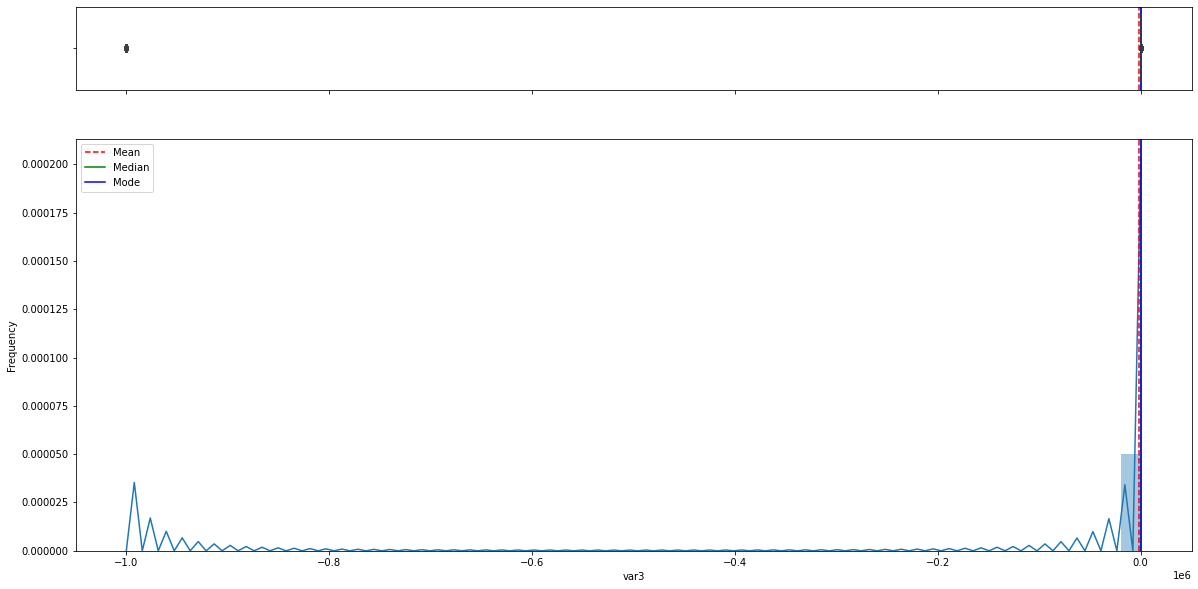

In [22]:
distributionOfNumericalColumns(traindataNew,"var3")

var3 value range is quite high min value is -999999.00000000, its most likely some default value where there is no data, as the other value ranges from 2 to 238
so unavailablity of data was replaced by the default value, This will create outlier issue
so in the later stages this value need to be cleaned up

min=5 	Q1 (25%) =23.0 	Q2 (50%) =28.0 
Q3 (75%) =40.0 	max=105  	(Q2-Q1)=5.0 
(Q3-Q2)=12.0 	(max-Q3)=65.0
IQR =17.0 Q1-1.5*IQR (lower whisker) =-2.5 Q3+1.5*IQR (upper whisker ) =65.5
Using IQR
no of Rows containing var15 as Outliers 2354


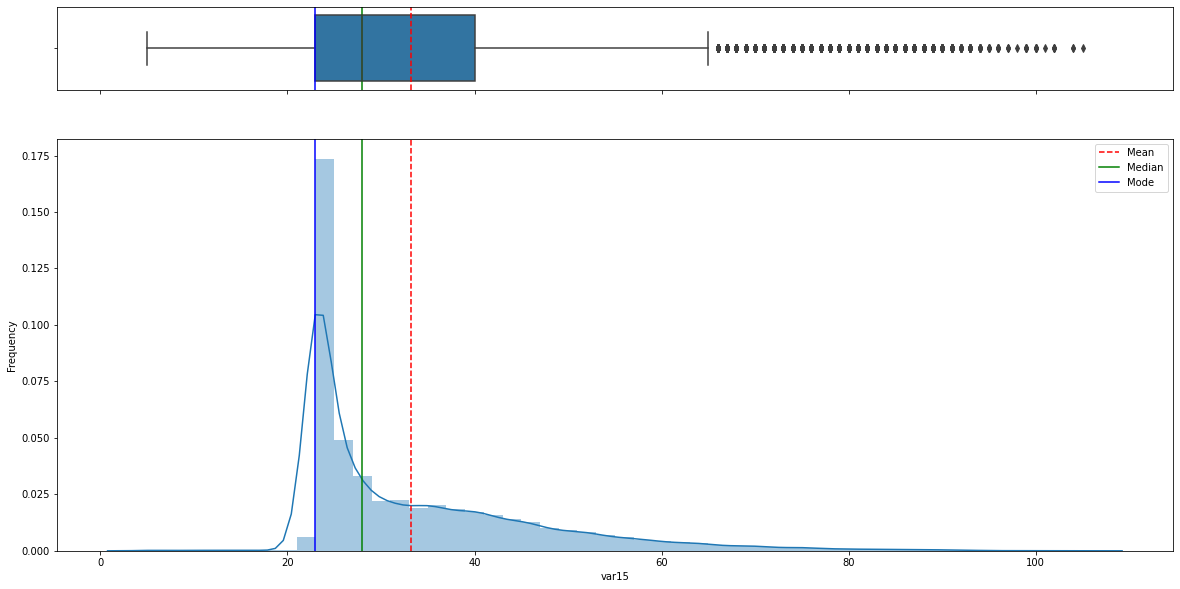

In [23]:
distributionOfNumericalColumns(traindataNew,"var15")

This column has a skewed distribution, most of the values appear at value 23.
so this is bound to be assymmetric distribution, and will result in potential outliers

min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=210000.0  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=210000.0
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_ent_var16_ult1 as Outliers 3719


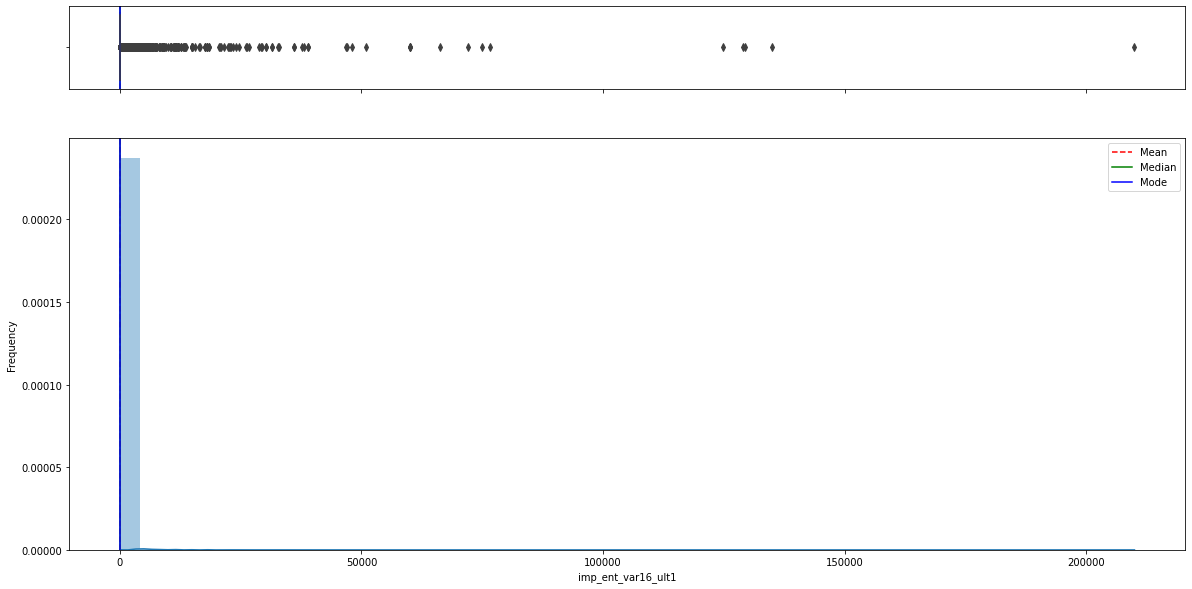

In [24]:
distributionOfNumericalColumns(traindataNew,"imp_ent_var16_ult1")

For this variable most of the values are zeroes and rest of the values appear only between q3 and max. so this will have outlier problem and column outliers need to be cleaned

min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=21024.81  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=21024.81
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_op_var39_comer_ult3 as Outliers 11690


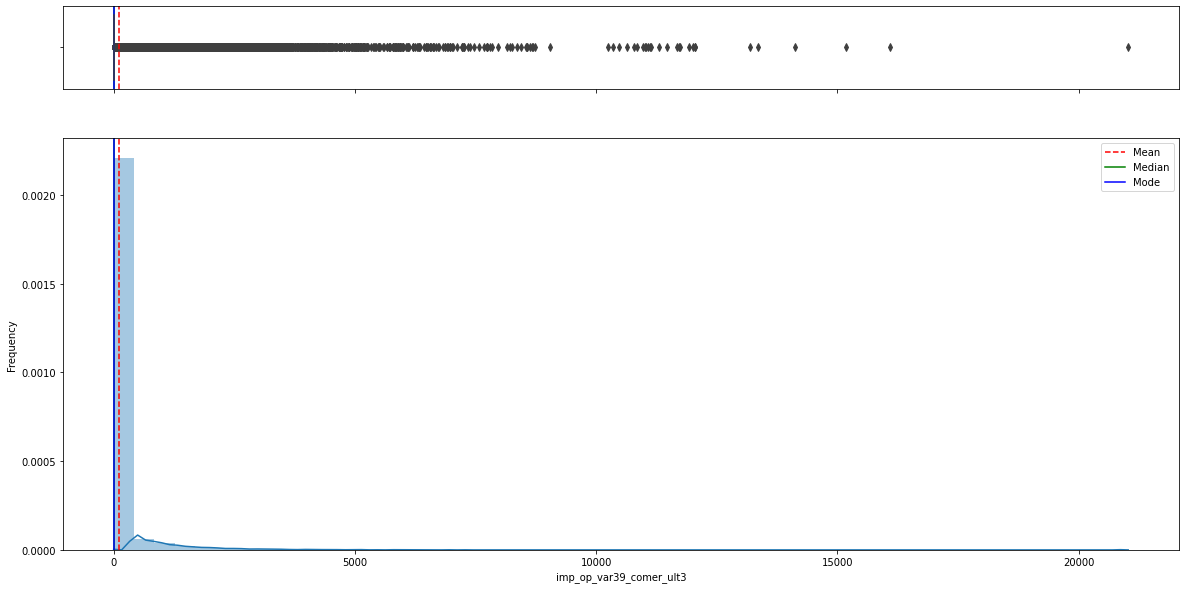

In [25]:
distributionOfNumericalColumns(traindataNew,"imp_op_var39_comer_ult3")